In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
results = pd.read_csv('../data/processed/analysis_results.csv')



print("zip codes:", len(results))
print(results.head())

zip codes: 9
   zip_code  avg_rent  median_rent  min_rent  max_rent  listing_count  \
0     90005   2650.00       2650.0    1350.0    3950.0              8   
1     90006   2175.05       1867.0    1190.0    5349.0            236   
2     90007   2956.36       2418.0    1295.0    5990.0             44   
3     90015   3323.08       2925.0    1900.0    8326.0             96   
4     90018   3775.82       4299.0    1350.0    4299.0             68   

   avg_rent_per_bed  crime_count  crime_rate  rent_normalized  rent_score  \
0           1350.00        20117     2514.62         0.480703       0.519   
1           1767.44        21125       89.51         0.261627       0.738   
2               NaN        30622      695.95         0.622015       0.378   
3           2270.79        30622      318.98         0.791169       0.209   
4           1593.56        23576      346.71         1.000000       0.000   

   crime_normalized  safety_score  overall_score  
0          0.490939         0.509 

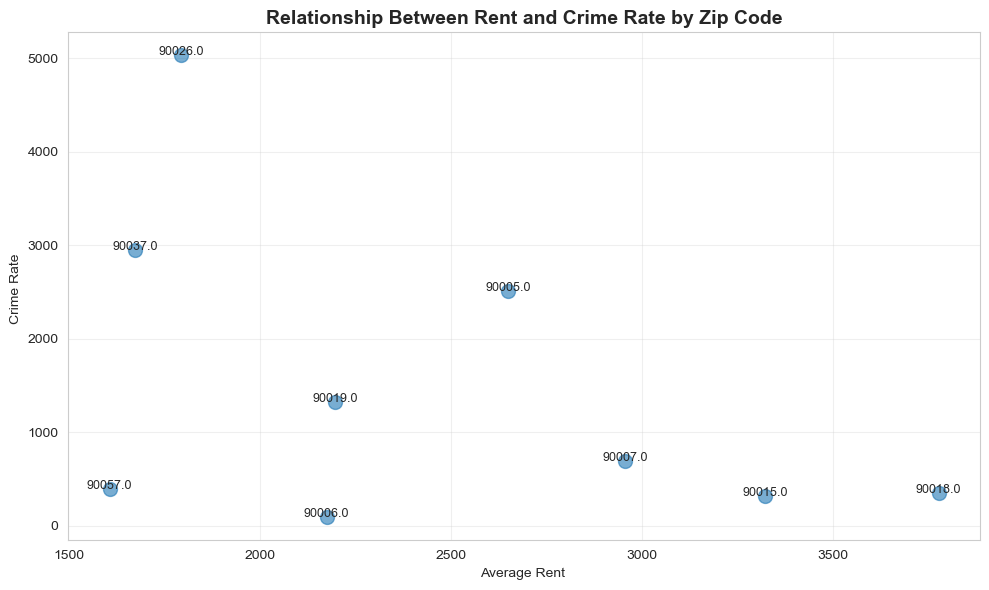

In [3]:

plt.figure(figsize=(10, 6))
plt.scatter(results['avg_rent'], results['crime_rate'], s = 100, alpha = 0.6)
for index, row in results.iterrows():
    plt.annotate(row['zip_code'], (row['avg_rent'], row['crime_rate']),fontsize = 9, ha = 'center')

plt.xlabel('Average Rent ')
plt.ylabel('Crime Rate ')
plt.title('Relationship Between Rent and Crime Rate by Zip Code', fontsize = 14, fontweight='bold')
plt.grid(True, alpha = 0.3)
plt.tight_layout()
plt.savefig("results/rent_vs_crime.png", dpi=300, bbox_inches="tight")
plt.show()

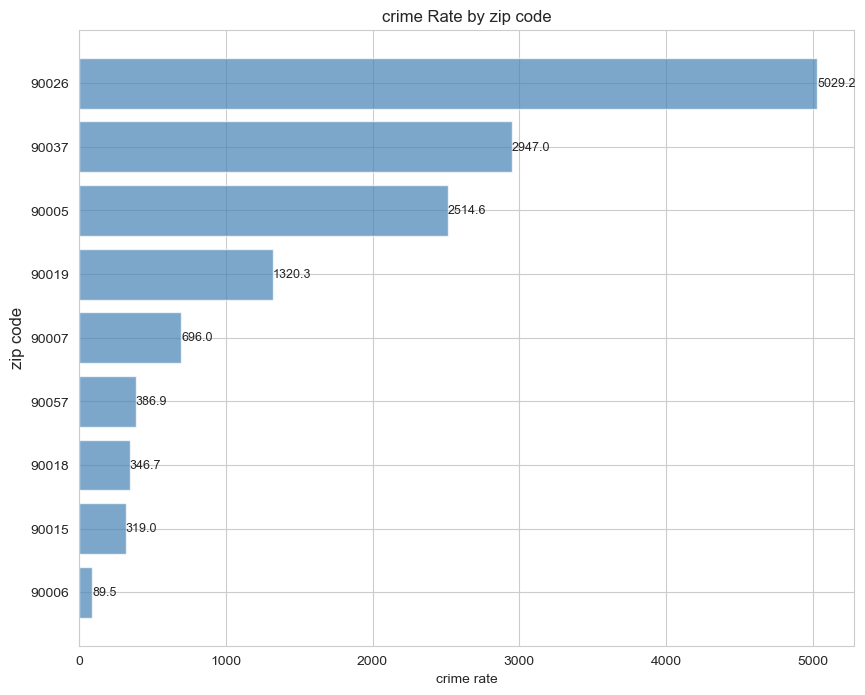

In [4]:

sorted_crime = results.sort_values('crime_rate', ascending=True)
plt.figure(figsize=(10, 8))
bars = plt.barh(sorted_crime['zip_code'].astype(str), sorted_crime['crime_rate'],color='steelblue',alpha=0.7)
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, f'{width:.1f}', ha='left', va='center', fontsize=9)
plt.xlabel('crime rate')
plt.ylabel('zip code', fontsize=12)
plt.title('crime Rate by zip code')
plt.savefig('results/crime_by_zip.png', dpi=300, bbox_inches='tight')
plt.show()

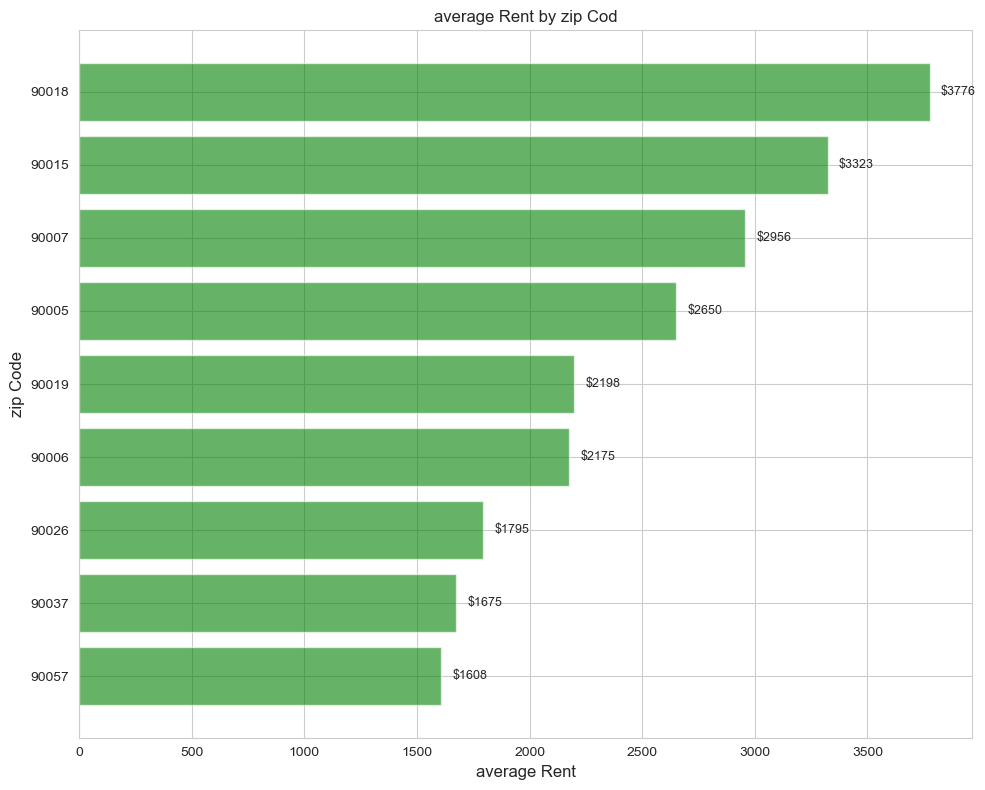

In [5]:

sorted_rent = results.sort_values('avg_rent', ascending = True)

plt.figure(figsize=(10, 8))
bars = plt.barh(sorted_rent['zip_code'].astype(str),sorted_rent['avg_rent'], color='green', alpha=0.6)

for bar in bars:
    width = bar.get_width()
    plt.text(width + 50, bar.get_y() + bar.get_height()/2, f'${width:.0f}', ha='left', va='center', fontsize=9)

plt.xlabel('average Rent', fontsize=12)
plt.ylabel('zip Code', fontsize=12)
plt.title('average Rent by zip Cod')
plt.tight_layout()
plt.savefig('results/rent_by_zip.png', dpi=300, bbox_inches='tight')
plt.show()

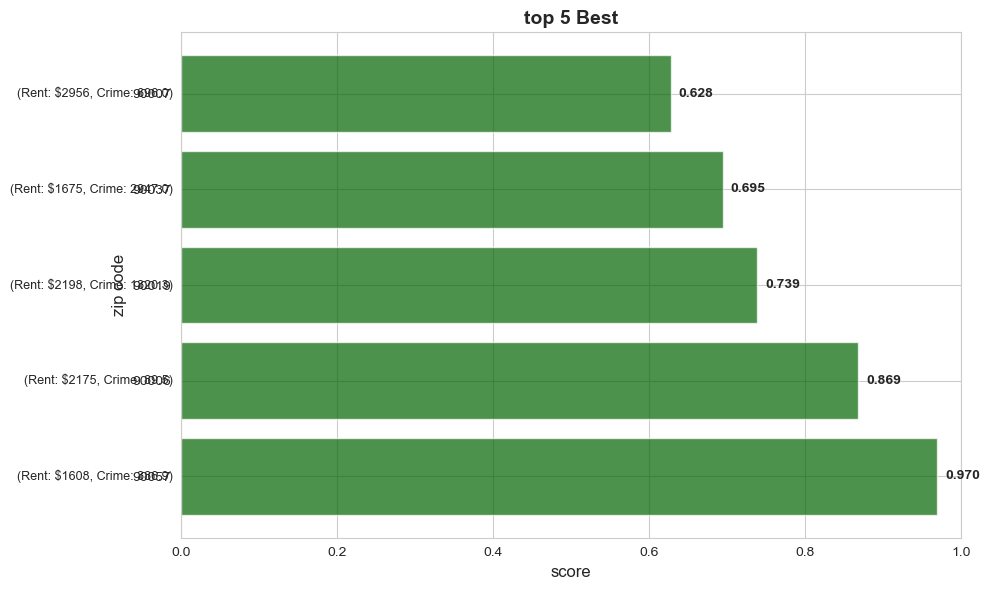

In [6]:
top_5 = results.nlargest(5, 'overall_score')

if len(top_5) == 0:
    print("No data to plot for top neighborhoods")
else:
    plt.figure(figsize=(10, 6))
    bars = plt.barh(range(len(top_5)), top_5['overall_score'].values,color='darkgreen',alpha=0.7)
    plt.yticks(range(len(top_5)), top_5['zip_code'].astype(str).values)
    for i, (index, row) in enumerate(top_5.iterrows()):
        plt.text(row['overall_score'] + 0.01, i, f"{row['overall_score']:.3f}",ha='left', va='center', fontsize=10, fontweight='bold')
        label = f"(Rent: ${row['avg_rent']:.0f}, Crime: {row['crime_rate']:.1f})"
        plt.text(-0.01, i, label, ha='right', va='center', fontsize=9)

    plt.xlabel('score', fontsize=12)
    plt.ylabel('zip code', fontsize=12)
    plt.title('top 5 Best', fontsize=14, fontweight='bold')
    plt.xlim(0, 1.0)
    plt.tight_layout()
    plt.show()

In [7]:

report_table = results[['zip_code', 'avg_rent', 'crime_rate', 'overall_score']]
report_table = report_table.sort_values('overall_score', ascending=False)
report_table.columns = ['Zip Code', 'Avg Rent ($)', 'Crime Rate', 'Overall Score']
report_table['Avg Rent ($)'] = report_table['Avg Rent ($)'].round(0).astype(int)
report_table['Crime Rate'] = report_table['Crime Rate'].round(2)
report_table['Overall Score'] = report_table['Overall Score'].round(3)
print(report_table.head(10).to_string(index=False))
report_table.to_csv('results/summary_table.csv', index = False)


 Zip Code  Avg Rent ($)  Crime Rate  Overall Score
    90057          1608      386.87          0.970
    90006          2175       89.51          0.869
    90019          2198     1320.31          0.739
    90037          1675     2947.00          0.695
    90007          2956      695.95          0.628
    90015          3323      318.98          0.581
    90005          2650     2514.62          0.514
    90018          3776      346.71          0.474
    90026          1795     5029.25          0.457


In [8]:
correlation = results['avg_rent'].corr(results['crime_rate'])


print("   Correlation coefficient:", round(correlation, 3))
if correlation < 0:

    print("higher rent areas have lower crime")
else:
    print("higher rent areas have higher crime")
print("cheapest zip:", results.loc[results['avg_rent'].idxmin(), 'zip_code'])
print("cheapest rent: $", round(results['avg_rent'].min(), 2))
print("most expensive zip:", results.loc[results['avg_rent'].idxmax(), 'zip_code'])
print("rost expensive rent: $", round(results['avg_rent'].max(), 2))
print("range: $", round(results['avg_rent'].max() - results['avg_rent'].min(), 2))
print("safest zip:", results.loc[results['crime_rate'].idxmin(), 'zip_code'])
print("lowest crime rate:", round(results['crime_rate'].min(), 2))
print("most dangerous zip:", results.loc[results['crime_rate'].idxmax(), 'zip_code'])
print("highest crime :", round(results['crime_rate'].max(), 2))
best_zip = results.loc[results['overall_score'].idxmax()]
print("zip:", best_zip['zip_code'])
print("avg rent: $", round(best_zip['avg_rent'], 2))
print("crime rate:", round(best_zip['crime_rate'], 2))
print("score:", round(best_zip['overall_score'], 3))
print("totoal zips:", len(results))
print("tital apts:", int(results['listing_count'].sum()))
print("crime incidents:", int(results['crime_count'].sum()))



   Correlation coefficient: -0.473
higher rent areas have lower crime
cheapest zip: 90057
cheapest rent: $ 1607.85
most expensive zip: 90018
rost expensive rent: $ 3775.82
range: $ 2167.97
safest zip: 90006
lowest crime rate: 89.51
most dangerous zip: 90026
highest crime : 5029.25
zip: 90057.0
avg rent: $ 1607.85
crime rate: 386.87
score: 0.97
totoal zips: 9
tital apts: 532
crime incidents: 210997
